# Exercise 1 - Regression Task

## 1. Algorithm Implementation

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("/kaggle/input/anime-data/anime.csv")

print(data)

       MAL_ID                             Name    Score  \
0           1                     Cowboy Bebop     8.78   
1           5  Cowboy Bebop: Tengoku no Tobira     8.39   
2           6                           Trigun     8.24   
3           7               Witch Hunter Robin     7.27   
4           8                   Bouken Ou Beet     6.98   
...       ...                              ...      ...   
17557   48481  Daomu Biji Zhi Qinling Shen Shu  Unknown   
17558   48483                     Mieruko-chan  Unknown   
17559   48488  Higurashi no Naku Koro ni Sotsu  Unknown   
17560   48491      Yama no Susume: Next Summit  Unknown   
17561   48492                    Scarlet Nexus  Unknown   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Mystery, Police, Supernatural, Drama

In [3]:
data.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
data.tail()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17561,48492,Scarlet Nexus,Unknown,"Action, Fantasy",Unknown,SCARLET NEXUS,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [5]:
data.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [6]:
data['value_clean'] = pd.to_numeric(data['Score'], errors='coerce')
data_filtered = data[data['value_clean'].notna()]

print("Filtered Data")
print(data_filtered)

Filtered Data
       MAL_ID                                            Name Score  \
0           1                                    Cowboy Bebop  8.78   
1           5                 Cowboy Bebop: Tengoku no Tobira  8.39   
2           6                                          Trigun  8.24   
3           7                              Witch Hunter Robin  7.27   
4           8                                  Bouken Ou Beet  6.98   
...       ...                                             ...   ...   
17504   47398                   Kimetsu Gakuen: Valentine-hen  6.59   
17505   47402                                       Heikousen  7.52   
17512   47614    Nu Wushen de Canzhuo Spring Festival Special  6.83   
17513   47616  Yakusoku no Neverland 2nd Season: Michishirube  4.81   
17552   48456                             SK∞: Crazy Rock Jam  6.52   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1            

In [7]:
x = data["MAL_ID"]
y = pd.to_numeric(data['Score'], errors='coerce').fillna(0).astype('int64') # Convert "Unknowns" into 0s

# Take first 1000 rows
x_limited = x.head(100)
y_limited = y.head(100)

In [8]:
x_limited

0       1
1       5
2       6
3       7
4       8
     ... 
95    116
96    117
97    118
98    119
99    120
Name: MAL_ID, Length: 100, dtype: int64

In [9]:
y_limited

0     8
1     8
2     8
3     7
4     6
     ..
95    6
96    7
97    6
98    6
99    7
Name: Score, Length: 100, dtype: int64

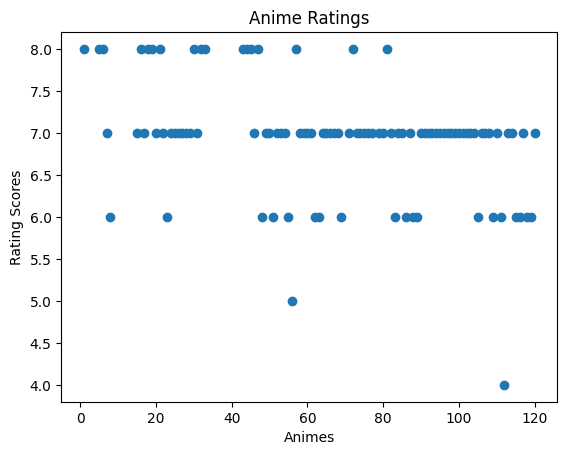

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x_limited, y_limited)  # or plt.plot(x_limited, y_limited, 'o')
plt.title('Anime Ratings')
plt.xlabel('Animes')
plt.ylabel('Rating Scores')
plt.show()